In [2]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import scipy.stats as stats

In [3]:
data = "data/total_data_clean.csv"
data_df = pd.read_csv(data)

In [4]:
data_df
df = data_df.copy()

In [5]:
# Creating non-covid dataframe - not including years 2020 & 2021

non_covid_df = df[(df.Year != 2020) & (df.Year != 2021)]

non_covid_df

,Country,Region,Happiness_Rank,Happiness_Score,Economy_GDP,Family,Life_Expectancy,Freedom,Trust_in_Gov,Generosity,Dystopia_Residual,Year
0,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Botswana*,NaN,142.0,3.471,1.50300,0.815,0.28000,0.57100,0.10200,0.01200,0.187,2022
1226,Rwanda*,NaN,143.0,3.268,0.78500,0.133,0.46200,0.62100,0.54400,0.18700,0.536,2022
1227,Zimbabwe,NaN,144.0,2.995,0.94700,0.69,0.27000,0.32900,0.10500,0.10600,0.548,2022
1228,Lebanon,NaN,145.0,2.955,1.39200,0.498,0.63100,0.10300,0.03400,0.08200,0.216,2022


In [6]:
# Creating Covid-only DataFrame - years = 2020 & 2021
covid_df = df[(df.Year == 2020) | (df.Year == 2021)]
covid_df

,Country,Region,Happiness_Rank,Happiness_Score,Economy_GDP,Family,Life_Expectancy,Freedom,Trust_in_Gov,Generosity,Dystopia_Residual,Year
782,Finland,Western Europe,NaN,7.8087,10.639267,0.954329729,71.900825,0.949172,0.195445,-0.059482,2.762835026,2020
783,Denmark,Western Europe,NaN,7.6456,10.774001,0.955990791,72.402504,0.951444,0.168489,0.066202,2.432740688,2020
784,Switzerland,Western Europe,NaN,7.5599,10.979933,0.942846596,74.102448,0.921337,0.303728,0.105911,2.35026741,2020
785,Iceland,Western Europe,NaN,7.5045,10.772559,0.974669576,73.000000,0.948892,0.711710,0.246944,2.460688114,2020
786,Norway,Western Europe,NaN,7.4880,11.087804,0.952486575,73.200783,0.955750,0.263218,0.134533,2.168266296,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Lesotho,Sub-Saharan Africa,144.0,3.5120,7.926000,0.787,48.700000,0.715000,0.915000,-0.131000,1.8,2021
1080,Botswana,Sub-Saharan Africa,145.0,3.4670,9.782000,0.784,59.269000,0.824000,0.801000,-0.246000,0.648,2021
1081,Rwanda,Sub-Saharan Africa,146.0,3.4150,7.676000,0.552,61.400000,0.897000,0.167000,0.061000,1.095,2021
1082,Zimbabwe,Sub-Saharan Africa,147.0,3.1450,7.943000,0.75,56.201000,0.677000,0.821000,-0.047000,1.205,2021


The r-squared for covid years is: 0.6118250388480205
The p-value is for covid years: 1.3271620473430056e-63
The r-squared for non-covid years is: 0.5479186561545948
The p-value is for non-covid years: 8.204516086443966e-162


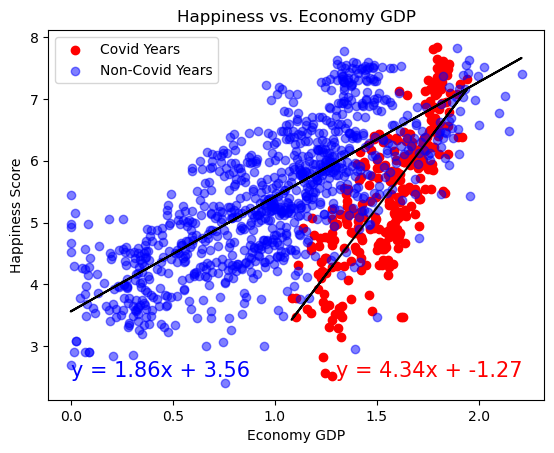

<Figure size 640x480 with 0 Axes>

In [7]:
# Plot out covid years
x_cov = covid_df['Economy_GDP'] / 6
#divide this by 6 to normalize because the scale on the covid data is 6 times greater than non-covid
y_cov = covid_df['Happiness_Score']
plt.scatter(x_cov,y_cov,color='r',label = "Covid Years" )
#plot out noncovid years
x_ncov = non_covid_df['Economy_GDP'] 
y_ncov = non_covid_df['Happiness_Score']
plt.scatter(x_ncov,y_ncov,color='b',alpha = .5, label = "Non-Covid Years")


#linear regression for covid
(slope, intercept, rvalue1, pvalue1, stderr) = linregress(x_cov, y_cov)
regress_values_covid = x_cov * slope + intercept
line_eq_cov = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_cov,regress_values_covid,"k-")
plt.annotate(line_eq_cov,(1.30,2.5),fontsize=15,color="r")
print(f"The r-squared for covid years is: {rvalue1**2}")
print(f"The p-value is for covid years: {pvalue1}")

#linear regression for noncovid
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_ncov, y_ncov)
regress_values_noncovid = x_ncov * slope + intercept
line_eq_ncov = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_ncov,regress_values_noncovid,"k-")
plt.annotate(line_eq_ncov,(0,2.5),fontsize=15,color="b")
print(f"The r-squared for non-covid years is: {rvalue**2}")
print(f"The p-value is for non-covid years: {pvalue}")

plt.xlabel('Economy GDP')
plt.ylabel('Happiness Score')
plt.title('Happiness vs. Economy GDP')
plt.legend()
plt.show()

#Save the figure
plt.savefig("plots/GDP_plot_combined.png")

In [8]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(x_cov.mean(), x_ncov.mean(), equal_var=False)

/var/folders/26/chsh3pkx14dg5ywx894b8gwm0000gn/T/ipykernel_15908/2561558745.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(x_cov.mean(), x_ncov.mean(), equal_var=False)
/Users/kelsey/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/kelsey/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Ttest_indResult(statistic=nan, pvalue=nan)